# To-Do
Read the labels to every picture.  
Divide the data in train and test data.  
Statistics about pictures. How many are there.

In [67]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder #responsible for loading images from train and test folders
from torch.utils.data import DataLoader # Definition of iterable
from torchvision import transforms # Provides image transformations
import torch
from config import *
import shutil
import seaborn as sns
import random
import cv2
from tensorflow.keras.preprocessing import image 

In [2]:
DATASET_PATH

'../data/PKLot/PKLotSegmented_rearranged/PUC/Sunny/'

### Get data

In [12]:
# if not os.path.exists(os.path.join(DATASET_PATH,'Empty')):
# 		os.makedirs(os.path.join(DATASET_PATH,'Empty'))
# if not os.path.exists(os.path.join(DATASET_PATH,'Occupied')):
# 		os.makedirs(os.path.join(DATASET_PATH,'Occupied'))


In [3]:
daylist = os.listdir(DATASET_PATH_RAW)
labels = ['Empty','Occupied']


In [4]:
for label in labels:
    print(label)


Empty
Occupied


In [15]:
# for day in daylist:
#     for label in labels:
#         daypath = os.path.join(DATASET_PATH_RAW,day)
#         path = os.path.join(daypath,label)
#         destpath =  os.path.join(DATASET_PATH,label)
#         if os.path.exists(path):
#             filelist = os.listdir(path)
#             for file in filelist:
#                 filepath = os.path.join(path,file)
#                 shutil.copy(filepath,destpath)
#         else:
#             print(f'path {path} empty')

                

path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-10-30/Empty empty
path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-11-07/Empty empty
path ../data/PKLot/PKLotSegmented/PUC/Sunny/2012-11-06/Empty empty


In [5]:
emptylist= os.listdir(os.path.join(DATASET_PATH,'Empty'))
occupiedlist = os.listdir(os.path.join(DATASET_PATH,'Occupied'))

In [6]:

trainpath = os.path.join(DATASET_PATH,'train')
testpath = os.path.join(DATASET_PATH,'test')
valpath = os.path.join(DATASET_PATH,'val')
# if not os.path.exists(trainpath):
#     os.makedirs(trainpath)
#     os.makedirs(os.path.join(trainpath,'Empty'))
#     os.makedirs(os.path.join(trainpath,'Occupied'))
   
# if not os.path.exists(testpath):
# 	os.makedirs(testpath)
# 	os.makedirs(os.path.join(testpath,'Empty'))
# 	os.makedirs(os.path.join(testpath,'Occupied'))

# if not os.path.exists(valpath):
# 	os.makedirs(valpath)
# 	os.makedirs(os.path.join(valpath,'Empty'))
# 	os.makedirs(os.path.join(valpath,'Occupied'))
  


In [35]:
# Train Val Test split.

# #for path, subdirs, files in os.walk(root):
# for label in labels:
#     path =  os.path.join(DATASET_PATH,label)
#     random.seed(42)
#     filelist = os.listdir(path)
#     random.shuffle(filelist)
    
#     train_size = int(len(filelist) * 0.70)
#     val_size = int(len(filelist) * 0.15)
#     test_size = int(len(filelist) * 0.15)
    
#     #Creating train data
#     for file in filelist[0:train_size]:
#         filepath = os.path.join(path,file)
#         shutil.copy(filepath,os.path.join(trainpath,label))
        
#     #Creating val data
#     for file in filelist[train_size:(train_size + val_size )]:
#         filepath = os.path.join(path,file)
#         shutil.copy(filepath,os.path.join(valpath,label))
        
#     #Creating test data
#     for file in filelist[train_size + val_size: (train_size + val_size + test_size )]:
#         filepath = os.path.join(path,file)
#         shutil.copy(filepath,os.path.join(testpath,label))

In [7]:
DATASET_PATH

'../data/PKLot/PKLotSegmented_rearranged/PUC/Sunny/'

# EDA

- Check number of pictures
- Check size of pictures

In [8]:
print(len(emptylist))
len(occupiedlist)


111626


96761

<Axes: >

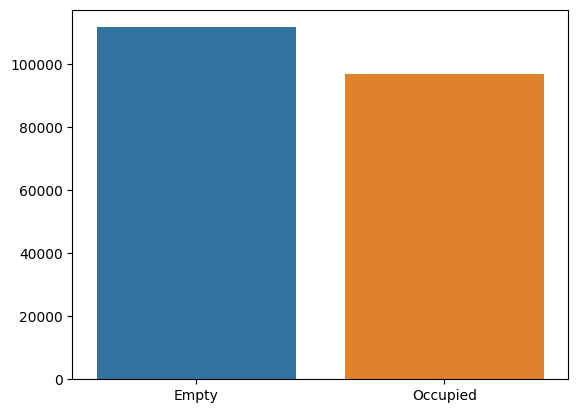

In [9]:
sns.barplot(x=labels, y =[len(emptylist), len(occupiedlist)])
# Numbers of classes almost equal.


# Baseline model

In [27]:
# Dataloader in pytorch
# Imagefolder expects the class to be in the foldername.

# To-Do: Define transformations to be done. 
# Flip
# Rescale of values to 0,1
# shear range 
# zoomrange

resize = transforms.Resize(size=(INPUT_HEIGHT,INPUT_WIDTH) )
trainTransfo = transforms.Compose([resize, transforms.ToTensor()])


trainDataset = ImageFolder(root=trainpath,
        transform=trainTransfo)
valDataset = ImageFolder(root=valpath, 
        transform=trainTransfo)

trainDataLoader = DataLoader(trainDataset, 
        batch_size=BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)

In [36]:
# Dataloader in tensorflow
trainBatch = next(iter(trainDataLoader))

In [70]:


# Convert the image from BGR to RGB (OpenCV uses BGR by default)
trainDataset[0]
#img_rgb = cv2.cvtColor(image.img_to_array(trainDataset[0][0],dtype='uint8'), cv2.COLOR_BGR2RGB)


(tensor([[[0.8784, 0.8784, 0.8784,  ..., 0.7843, 0.7843, 0.7843],
          [0.8784, 0.8784, 0.8784,  ..., 0.7765, 0.7765, 0.7765],
          [0.8745, 0.8745, 0.8745,  ..., 0.7529, 0.7529, 0.7529],
          ...,
          [0.8549, 0.8549, 0.8549,  ..., 0.8510, 0.8510, 0.8510],
          [0.8549, 0.8549, 0.8549,  ..., 0.8510, 0.8510, 0.8510],
          [0.8549, 0.8549, 0.8549,  ..., 0.8510, 0.8510, 0.8510]],
 
         [[0.8902, 0.8902, 0.8902,  ..., 0.7490, 0.7490, 0.7490],
          [0.8902, 0.8902, 0.8902,  ..., 0.7412, 0.7412, 0.7412],
          [0.8863, 0.8863, 0.8863,  ..., 0.7216, 0.7216, 0.7216],
          ...,
          [0.8471, 0.8471, 0.8471,  ..., 0.8588, 0.8588, 0.8588],
          [0.8471, 0.8471, 0.8471,  ..., 0.8549, 0.8549, 0.8549],
          [0.8471, 0.8471, 0.8471,  ..., 0.8549, 0.8549, 0.8549]],
 
         [[0.8078, 0.8078, 0.8078,  ..., 0.5804, 0.5804, 0.5765],
          [0.8078, 0.8078, 0.8078,  ..., 0.5725, 0.5725, 0.5686],
          [0.8039, 0.8039, 0.8039,  ...,

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 128


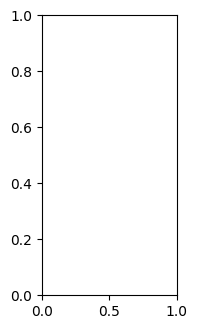

In [35]:
# Vizualization doesn't work yet.
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	fig = plt.figure("{} batch".format(dataset_type),
		figsize=(BATCH_SIZE, BATCH_SIZE))
	# loop over the batch size
	for i in range(0, BATCH_SIZE):
		# create a subplot
		ax = plt.subplot(2, 4, i + 1)
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		# Convert the image from BGR to RGB (OpenCV uses BGR by default)
		
		image = batch[0][i].cpu().numpy()
		#image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx]
		# show the image along with the label
		plt.imshow(image)
		plt.title(label)
		plt.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()
 
trainBatch = next(iter(trainDataLoader))
visualize_batch(trainBatch, trainDataset.classes, "train")

In [30]:
trainBatch

[tensor([[[[0.4392, 0.4392, 0.4392,  ..., 0.2510, 0.2627, 0.2667],
           [0.4392, 0.4392, 0.4392,  ..., 0.2549, 0.2627, 0.2667],
           [0.4392, 0.4392, 0.4392,  ..., 0.2667, 0.2706, 0.2745],
           ...,
           [0.3059, 0.3059, 0.3059,  ..., 0.4353, 0.4353, 0.4353],
           [0.2941, 0.2941, 0.2941,  ..., 0.4392, 0.4392, 0.4392],
           [0.2902, 0.2902, 0.2902,  ..., 0.4392, 0.4392, 0.4392]],
 
          [[0.4549, 0.4549, 0.4549,  ..., 0.2549, 0.2667, 0.2706],
           [0.4549, 0.4549, 0.4549,  ..., 0.2588, 0.2667, 0.2706],
           [0.4510, 0.4510, 0.4510,  ..., 0.2706, 0.2745, 0.2784],
           ...,
           [0.2941, 0.2941, 0.2980,  ..., 0.4157, 0.4157, 0.4157],
           [0.2863, 0.2863, 0.2863,  ..., 0.4157, 0.4157, 0.4157],
           [0.2824, 0.2824, 0.2824,  ..., 0.4157, 0.4157, 0.4157]],
 
          [[0.4000, 0.4000, 0.4000,  ..., 0.2353, 0.2431, 0.2471],
           [0.4000, 0.4000, 0.4000,  ..., 0.2353, 0.2431, 0.2471],
           [0.4000, 0.40